In [1]:
import tensorflow as tf
from matplotlib import pyplot
from keras.datasets import cifar10
from emnist import extract_training_samples
from tensorflow.keras import *
from tensorflow.keras.layers import *
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
import sys
import os
from keras.utils.vis_utils import plot_model

sys.path.insert(1, os.path.join(sys.path[0], '../../..'))

from utils import *

%matplotlib inline
%config Completer.use_jedi = False

tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

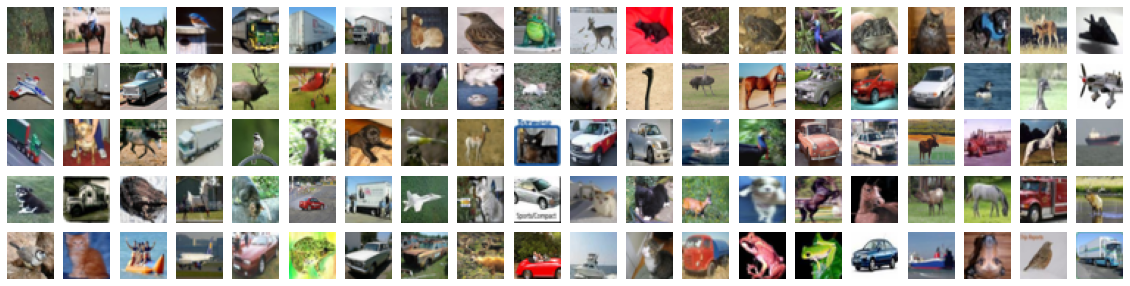

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
show_dataset(x_train)

In [3]:
x_test.shape

(10000, 32, 32, 3)

In [6]:
num_classes = 10 

mean = np.mean(x_train,axis=(0, 1, 2, 3))
std = np.std(x_train, axis=(0, 1, 2, 3))

x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)

y_train = utils.to_categorical(y_train, num_classes) 
y_test = utils.to_categorical(y_test, num_classes) 

In [4]:
def build_model(weight_decay= 0.00005, x_shape=[32,32,3], num_classes=10):
    model = Sequential()

    model.add(Conv2D(32, (3, 3), padding='same',
                         input_shape=x_shape,kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('elu'))
    model.add(BatchNormalization())
    
    model.add(Conv2D(32, (3, 3), padding='same',
                         input_shape=x_shape,kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('elu'))
    model.add(BatchNormalization())
    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))
    
    
    model.add(Conv2D(64, (3, 3), padding='same',
                         input_shape=x_shape,kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('elu'))
    model.add(BatchNormalization())
    
    model.add(Conv2D(64, (3, 3), padding='same',
                         input_shape=x_shape,kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('elu'))
    model.add(BatchNormalization())
    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))
    
    
    model.add(Conv2D(128, (3, 3), padding='same',
                         input_shape=x_shape,kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('elu'))
    model.add(BatchNormalization())
    
    model.add(Conv2D(128, (3, 3), padding='same',
                         input_shape=x_shape,kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('elu'))
    model.add(BatchNormalization())
    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))

   

    model.add(Flatten())
    model.add(Dense(128,kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('elu'))
    model.add(BatchNormalization())

    model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    return model

In [5]:
model = build_model()

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0

In [7]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [8]:
history = model.fit(x_train, y_train, batch_size=256, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
196/196 [==============================] - 9s 29ms/step - loss: 1.8884 - accuracy: 0.3863 - val_loss: 1.7911 - val_accuracy: 0.4144
Epoch 2/100
196/196 [==============================] - 5s 25ms/step - loss: 1.3286 - accuracy: 0.5375 - val_loss: 1.1302 - val_accuracy: 0.6152
Epoch 3/100
196/196 [==============================] - 5s 25ms/step - loss: 1.1116 - accuracy: 0.6170 - val_loss: 0.9741 - val_accuracy: 0.6661
Epoch 4/100
196/196 [==============================] - 5s 25ms/step - loss: 0.9866 - accuracy: 0.6648 - val_loss: 0.8361 - val_accuracy: 0.7184
Epoch 5/100
196/196 [==============================] - 5s 25ms/step - loss: 0.9079 - accuracy: 0.6959 - val_loss: 0.7777 - val_accuracy: 0.7415
Epoch 6/100
196/196 [==============================] - 5s 25ms/step - loss: 0.8456 - accuracy: 0.7170 - val_loss: 0.7358 - val_accuracy: 0.7582
Epoch 7/100
196/196 [==============================] - 5s 25ms/step - loss: 0.7897 - accuracy: 0.7369 - val_loss: 0.7430 - val_accuracy:

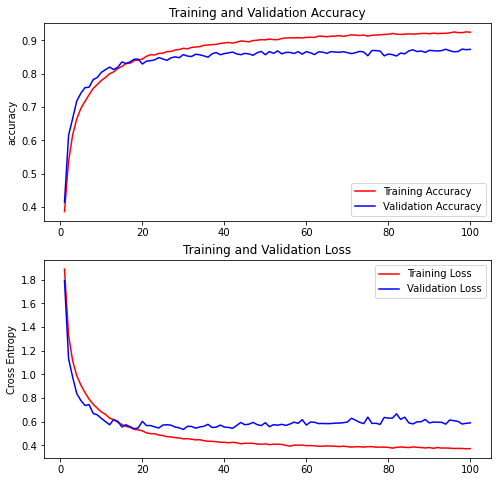

In [9]:
print_history_chart(history)

In [21]:
pprint(full_evaluate(model, x_test, y_test))

{'accuracy_score': 0.873,
 'f1_score_macro': 0.8717167555950566,
 'f1_score_weighted': 0.8742832444049432}


In [22]:
model.save('vanilla_cifar10.h5')

In [7]:
model = tf.keras.models.load_model("vanilla_cifar10.h5")

In [8]:
pprint(full_evaluate(model, x_test, y_test))

{'accuracy_score': 0.873,
 'f1_score_macro': 0.8717167555950566,
 'f1_score_weighted': 0.8742832444049432}


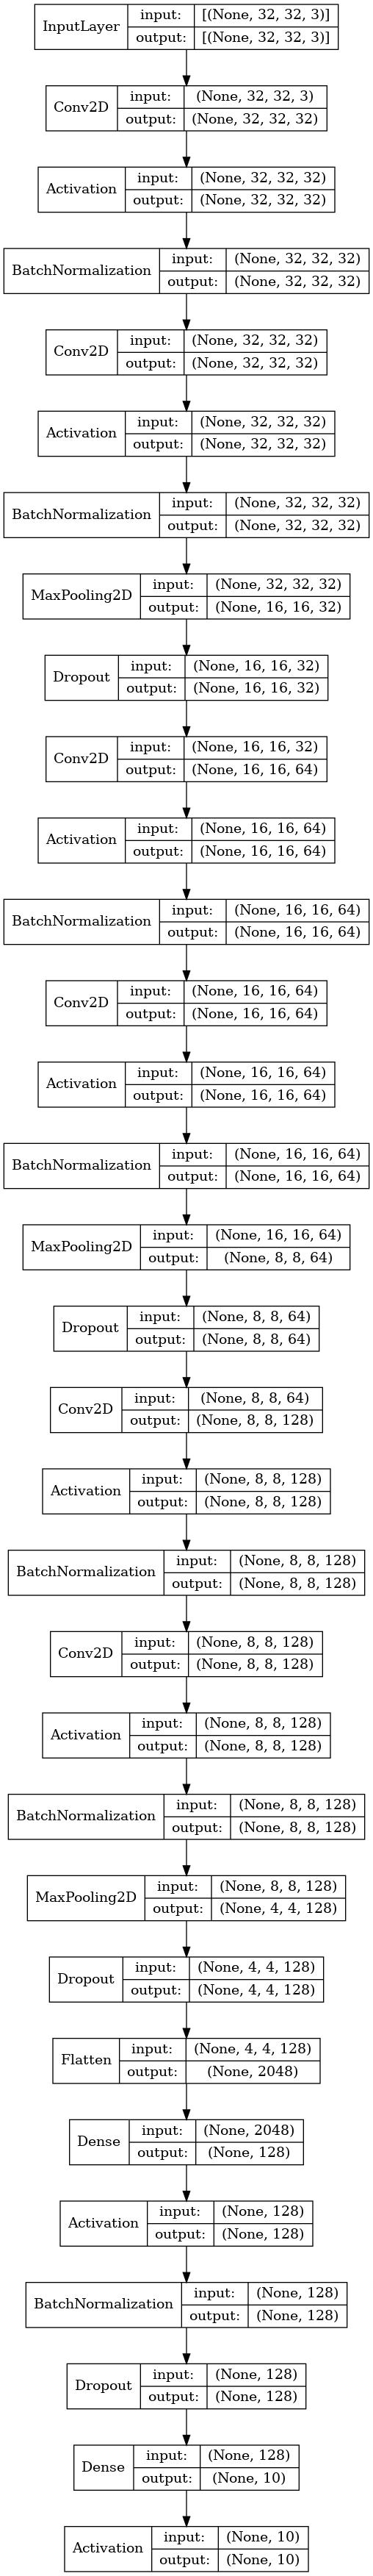

In [9]:
plot_model(model, show_shapes=True, show_layer_names=False)